# DDOS Detection

## Problem Statement: To be added

### Data Exploration

#### Importing dataset

In [1]:
import pandas as pd

In [2]:
colnames = ["duration","protocol_type","service","flag",
            "src_bytes","dst_bytes","land","wrong_fragment",
            "urgent","hot","num_failed_logins","logged_in",
            "num_compromised","root_shell","su_attempted",
            "num_root","num_file_creations","num_shells",
            "num_access_files","num_outbound_cmds",
            "is_host_login","is_guest_login","count",
            "srv_count","serror_rate","srv_serror_rate",
            "same_srv_rate","diff_srv_rate","srv_diff_host_rate",
            "una1","una2","dst_host_count","dst_host_srv_count",
            "dst_host_same_srv_rate","dst_host_diff_srv_rate",
            "dst_host_same_src_port_rate","dst_host_srv_diff_host_rate",
            "dst_host_serror_rate","dst_host_srv_serror_rate",
            "dst_host_rerror_rate","dst_host_srv_rerror_rate","result"]

In [3]:
corrected = pd.read_csv('kddcup.data_10_percent_corrected',names=colnames)

#### First 5 rows of the dataset

In [4]:
corrected.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


#### Columns and rows count

In [5]:
print("Number of rows: ", corrected.shape[0])
print("Number of columns: ", corrected.shape[1])

Number of rows:  494021
Number of columns:  42


#### Checking null values in the dataset

In [6]:
corrected[pd.isnull(corrected).any(axis=1)]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result


Dataset has no null values

#### Prediction classes

In [7]:
print("Number of classes in prediction class: ", len(corrected['result'].unique()))
corrected['result'].unique()

Number of classes in prediction class:  23


array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

#### This is a multi class classification problem, since we have 23 classes.

#### Checking duplicate data

In [8]:
print("Percentage of duplicate rows found: ", 
      (1 - corrected.drop_duplicates(subset=corrected.columns, keep='first').shape[0]/ corrected.shape[0]) * 100,
     "%")

Percentage of duplicate rows found:  70.53040255373759 %


#### Around 70% of data is duplicate, hence dropping duplicate rows.

In [9]:
corrected.drop_duplicates(subset=corrected.columns, keep='first',inplace=True)

In [10]:
print("Number of rows after removing duplicate records: ", corrected.shape[0])

Number of rows after removing duplicate records:  145586


### Exploring data

<AxesSubplot:title={'center':'Distribution of classes in result'}, xlabel='Subclasses', ylabel='Frequency count'>

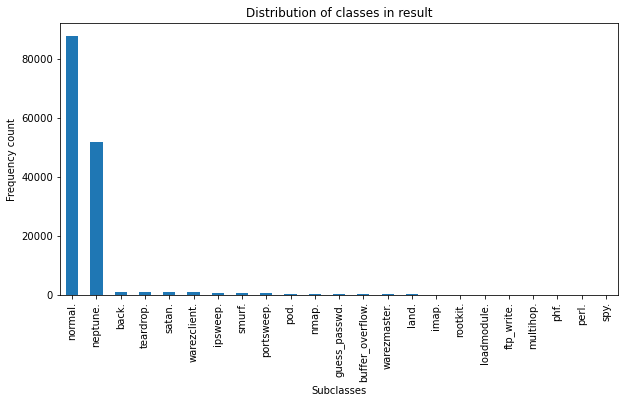

In [11]:
corrected['result'].value_counts().plot(kind ='bar',figsize = (10,5), 
                                        title= 'Distribution of classes in result',
                                        xlabel = 'Subclasses',
                                        ylabel='Frequency count')

In [12]:
print("Percentage distribution of classes in the output classes.")
(corrected['result'].value_counts() / corrected.shape[0]) * 100

Percentage distribution of classes in the output classes.


normal.             60.329977
neptune.            35.594082
back.                0.664899
teardrop.            0.630555
satan.               0.622313
warezclient.         0.613383
ipsweep.             0.447158
smurf.               0.440290
portsweep.           0.285742
pod.                 0.141497
nmap.                0.108527
guess_passwd.        0.036405
buffer_overflow.     0.020606
warezmaster.         0.013738
land.                0.013051
imap.                0.008243
rootkit.             0.006869
loadmodule.          0.006182
ftp_write.           0.005495
multihop.            0.004808
phf.                 0.002748
perl.                0.002061
spy.                 0.001374
Name: result, dtype: float64

#### As per the above plot we can see that class `normal.` and `neptune.` has the highest distritbution. And rest all classes has the very low distribution. This makes it a class imbalance problem with multi class classification.

#### Checking type of data for all the features

In [13]:
numerical_attr = []
categorical_attr = []
for feature,datatype in zip(corrected.columns,corrected.dtypes):
    if datatype != 'object':
        numerical_attr.append(feature)
    else:
        categorical_attr.append(feature)
print("Numerical attributes: \n", numerical_attr)
print("\nNumerical attributes count: ", len(numerical_attr))
print("-"*50)
print("Categorical attributes: \n", categorical_attr)
print("\nCategorical attributes count: ", len(categorical_attr))

Numerical attributes: 
 ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'una1', 'una2', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']

Numerical attributes count:  38
--------------------------------------------------
Categorical attributes: 
 ['protocol_type', 'service', 'flag', 'result']

Categorical attributes count:  4


#### The data has 38 numerical attributes and 4 categorical attributes.

#### Checking distribution of numerical features

In [14]:
corrected.loc[:,numerical_attr].describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,145586.000000,1.455860e+05,1.455860e+05,145586.000000,145586.000000,145586.000000,145586.000000,145586.000000,145586.000000,145586.000000,...,145586.000000,145586.000000,145586.000000,145586.000000,145586.000000,145586.000000,145586.000000,145586.000000,145586.000000,145586.000000
mean,132.025181,7.995700e+03,2.859780e+03,0.000137,0.020201,0.000048,0.100174,0.000515,0.491490,0.026177,...,181.468177,129.934678,0.553222,0.061389,0.092825,0.019048,0.291597,0.290978,0.110463,0.107675
std,1224.157053,1.820383e+06,6.080979e+04,0.011720,0.239368,0.010150,1.426798,0.028585,0.499929,3.311373,...,99.098197,114.714829,0.456236,0.147021,0.241123,0.060410,0.452492,0.453447,0.306097,0.304220
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,78.000000,12.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.470000e+02,1.050000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,117.000000,0.770000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.880000e+02,1.164750e+03,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.030000,0.020000,1.000000,1.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
def range_num(series):
    return series.max() - series.min()
def outliers(series):
    outliers_count = 0
    iqr = series.quantile(.75) - series.quantile(.25)
    iqr_upperbound = series.quantile(.75) + iqr*1.5
    iqr_lowerbound = series.quantile(.25) - iqr*1.5
    for oneValue in series.values:
        if oneValue > iqr_upperbound or oneValue < iqr_lowerbound:
            outliers_count += 1
    return outliers_count
def outliersPercentage(series):
    outliers_count = 0
    iqr = series.quantile(.75) - series.quantile(.25)
    iqr_upperbound = series.quantile(.75) + iqr*1.5
    iqr_lowerbound = series.quantile(.25) - iqr*1.5
    for oneValue in series.values:
        if oneValue > iqr_upperbound or oneValue < iqr_lowerbound:
            outliers_count += 1
    return (outliers_count/series.size) * 100
print("Summary for quantitative attributes.")
# using aggregate function to get mean, median, standard deviation and range
num_summary = corrected.agg(
    {
        col : ["mean", "median", "std", "min","max",range_num, outliers, outliersPercentage] for col in numerical_attr
    }
)
num_summary

Summary for quantitative attributes.


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
mean,132.025181,7.995700e+03,2.859780e+03,0.000137,0.020201,0.000048,0.100174,0.000515,0.491490,0.026177,...,181.468177,129.934678,0.553222,0.061389,0.092825,0.019048,0.291597,0.290978,0.110463,0.107675
median,0.000000,1.470000e+02,1.050000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,117.000000,0.770000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
std,1224.157053,1.820383e+06,6.080979e+04,0.011720,0.239368,0.010150,1.426798,0.028585,0.499929,3.311373,...,99.098197,114.714829,0.456236,0.147021,0.241123,0.060410,0.452492,0.453447,0.306097,0.304220
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
range_num,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
outliers,10611.000000,1.341200e+04,1.978900e+04,20.000000,1121.000000,4.000000,1957.000000,63.000000,0.000000,990.000000,...,0.000000,0.000000,0.000000,6926.000000,25227.000000,10614.000000,0.000000,0.000000,21333.000000,20330.000000
outliersPercentage,7.288476,9.212424e+00,1.359265e+01,0.013738,0.769992,0.002748,1.344223,0.043273,0.000000,0.680010,...,0.000000,0.000000,0.000000,4.757326,17.327902,7.290536,0.000000,0.000000,14.653195,13.964255


#### Columns with range greater than 1

In [16]:
num_standardization_cols = []
for col in num_summary.columns:
    if num_summary.loc['range_num',col] > 1:
        num_standardization_cols.append(col)

print("Numbers of columns with range greater than 1: ", len(num_standardization_cols))
num_standardization_cols

Numbers of columns with range greater than 1:  17


['duration',
 'src_bytes',
 'dst_bytes',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'num_compromised',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'count',
 'srv_count',
 'dst_host_count',
 'dst_host_srv_count']

#### From summary of numerical attributes following are the obervations.
* Data has potential outlier based on IQR.
* 10 columns have range of 1 i.e. we can skip standardization for these attributes.
* Rest columns can be standardized.

<AxesSubplot:>

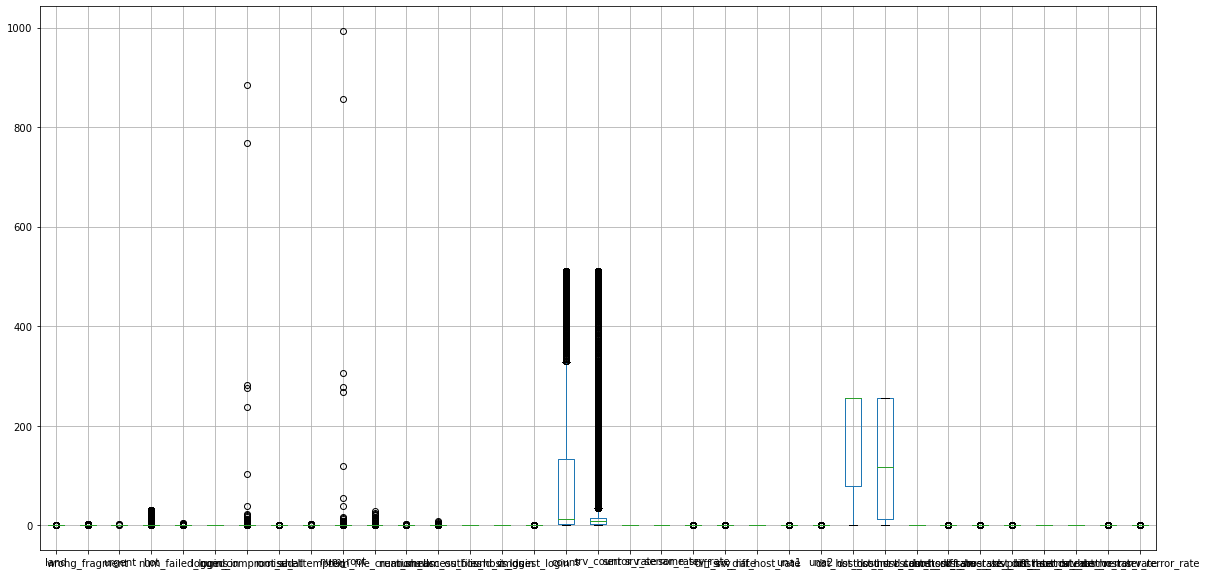

In [17]:
corrected.boxplot(column = numerical_attr[3:],figsize=(20,10))

#### Checking distribution of categorical features

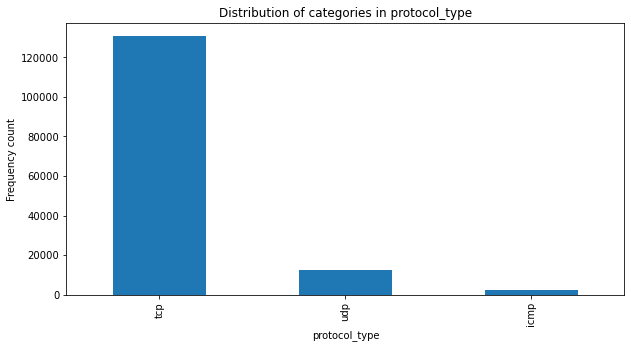

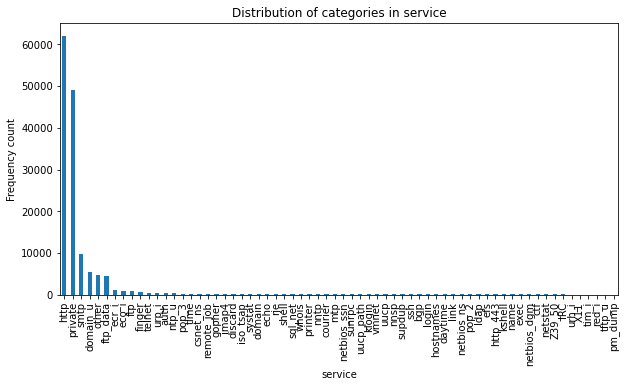

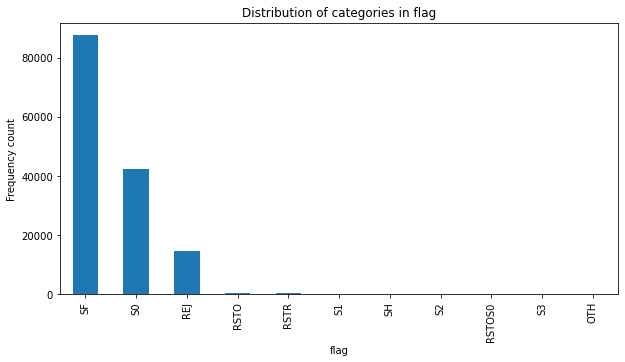

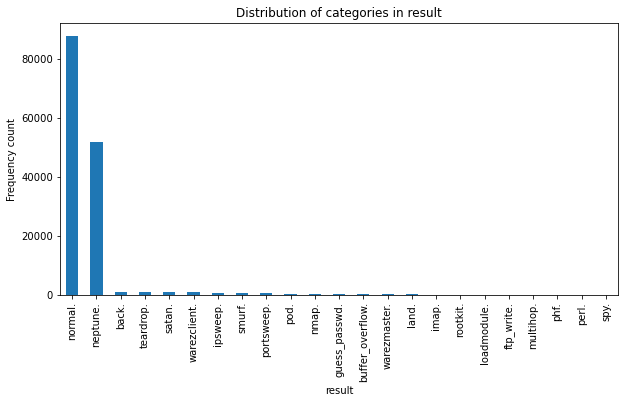

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
for col in categorical_attr:
    corrected[col].value_counts().plot(kind ='bar',figsize = (10,5), 
                                        title= 'Distribution of categories in ' + col,
                                        xlabel = col,
                                        ylabel='Frequency count')
    plt.show()

#### It can be seen that categorical data is highly imbalanced.
* In `protocol_type`, `tcp` has the highest distribution, and rest other classes have very low ditribution.
* In `service`, `http` and `private` has the highest distribution, and rest other classes have very low ditribution.
* In `flag`, `S0` and `SF` has the highest distribution, and rest other classes have very low ditribution.
* In `result`, `normal.` and `neptune.` has the highest distribution, and rest other classes have very low ditribution.

#### Subcategories count in categorical data

In [19]:
for col in categorical_attr:
    print("Subcategories in ", col, " : ", len(corrected[col].unique()))
    print("-"*40)

Subcategories in  protocol_type  :  3
----------------------------------------
Subcategories in  service  :  66
----------------------------------------
Subcategories in  flag  :  11
----------------------------------------
Subcategories in  result  :  23
----------------------------------------


#### For the columns `service` and `flag` has high number of subcategorices. On preprocessing these categorical attributes by converting them to numerical value using one hot encoding will result in adding a column per subcategory. In this case it would result in adding `66 + 11 + 3  - 3 = 77` columns. This would add to the complexity of the model. We will use baseN encoding which will highly reduce the dimentionality as the value of N is increased.

In [20]:
corrected.groupby(['protocol_type']).agg({'result': 'value_counts'})

result
protocol_type result                  
icmp          normal.              892
              smurf.               641
              ipsweep.             560
              pod.                 206
              nmap.                103
              satan.                 3
              portsweep.             1
tcp           normal.            75789
              neptune.           51820
              back.                968
              warezclient.         893
              satan.               733
              portsweep.           415
              ipsweep.              91
              guess_passwd.         53
              buffer_overflow.      30
              nmap.                 30
              warezmaster.          20
              land.                 19
              imap.                 12
              loadmodule.            9
              ftp_write.             8
              multihop.              7
              rootkit.               7
              phf.                   4
              perl.                  3
              spy.                   2
udp           normal.            11151
              teardrop.            918
              satan.               170
              nmap.                 25
              rootkit.               3

### Feature selection

#### Checking correlation for the features

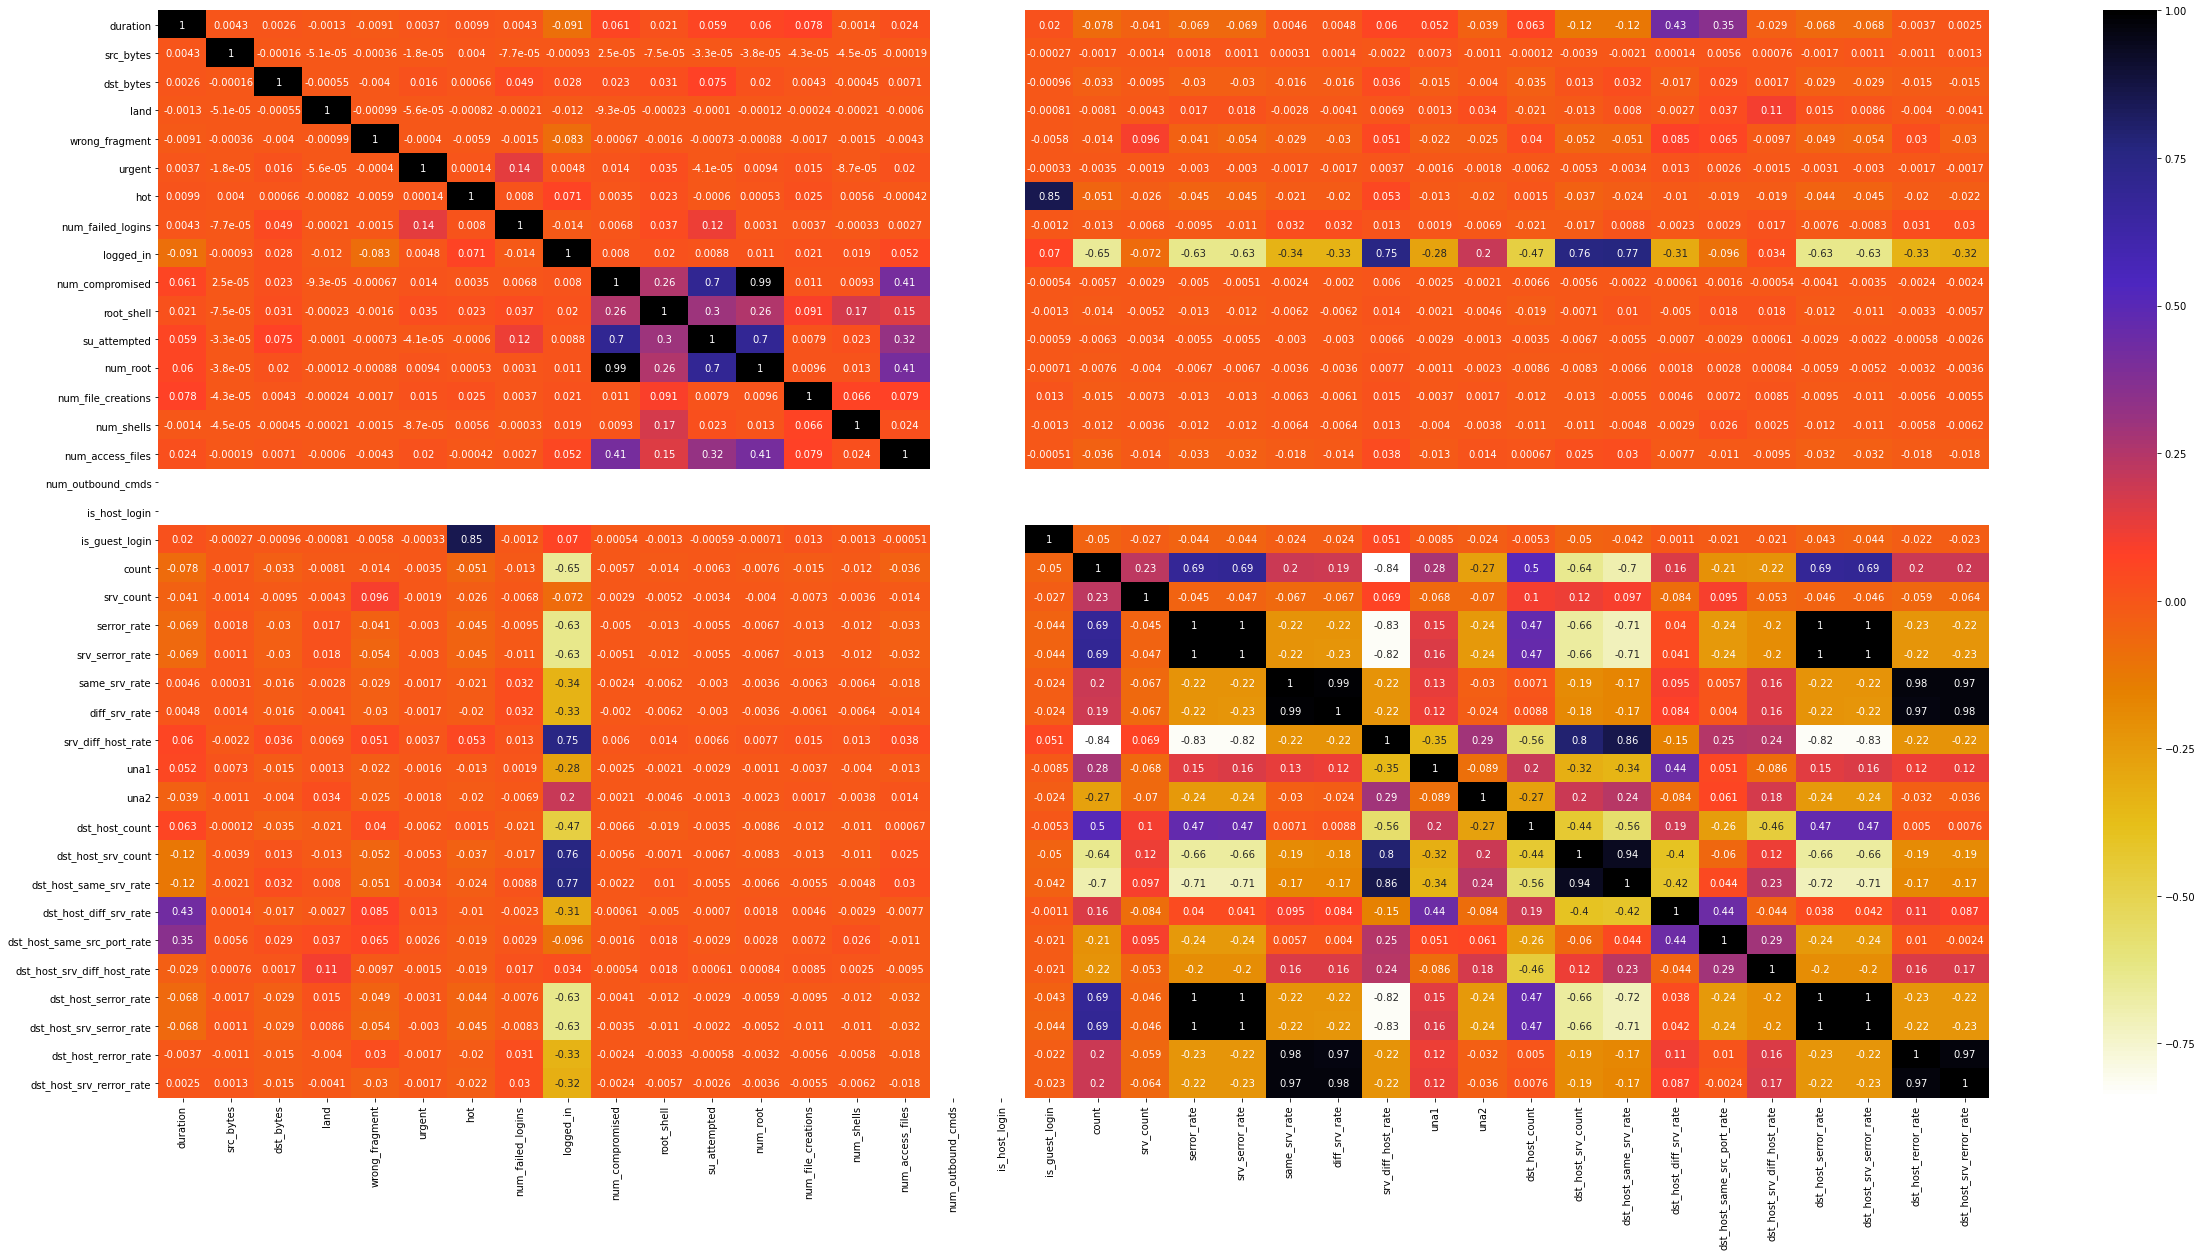

In [21]:
import seaborn as sns
plt.figure(figsize=(41,20))
cor = corrected.corr()
sns.heatmap(cor,annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

#### As per the correlation matrix above we can eliminate pairs with high correlation and consider only one feature from the pair of highly correlated features. For this problem we are using threshold correlation of 0.8.

In [22]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

#### Highly correlated feature from their pair

In [23]:
corr_features = correlation(corrected, 0.8)
print("Number of highly correlated pairs: ",len(set(corr_features)))
print("-"*40)
print("One feature from each highly correlated pair: \n", corr_features)

Number of highly correlated pairs:  9
----------------------------------------
One feature from each highly correlated pair: 
 {'dst_host_serror_rate', 'num_root', 'diff_srv_rate', 'dst_host_srv_rerror_rate', 'dst_host_same_srv_rate', 'dst_host_srv_serror_rate', 'is_guest_login', 'dst_host_rerror_rate', 'srv_serror_rate'}


#### Removing these features for model training

In [24]:
for col in numerical_attr:
    if col in corr_features:
        numerical_attr.remove(col)

for col in num_standardization_cols:
    if col in corr_features:
        num_standardization_cols.remove(col)

In [25]:
print("Numerical attributes after removing highly correlated featured: ", len(numerical_attr))

Numerical attributes after removing highly correlated featured:  31


In [26]:
print("Numerical attributes for standardization after removing highly correlated featured: ", len(num_standardization_cols))

Numerical attributes for standardization after removing highly correlated featured:  16


### Preprocessing the data

#### Creating pipeline for categorical data preprocessing

In [27]:
from sklearn.pipeline import Pipeline
import category_encoders as ce
categorical_attr_encoding = categorical_attr
categorical_attr_encoding.remove('result')
categorical_transformer = Pipeline(
    steps=[("base_encoding",ce.BaseNEncoder(base=2))])

#### Creating pipeline for numerical data preprocessing

In [28]:
from sklearn.preprocessing import StandardScaler
numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)

#### Creating full pipeline with numerical and categorical preprocessing

In [29]:
from sklearn.compose import ColumnTransformer
full_pipeline = ColumnTransformer(transformers=[
        ("num", numeric_transformer, num_standardization_cols),
        ("cat", categorical_transformer, categorical_attr_encoding),
        ("passthrough", "passthrough", list(set(numerical_attr) - set(num_standardization_cols)))
    ])

#### Transforming the data

In [30]:
df_tf = full_pipeline.fit_transform(corrected)

#### Shape of the transformed data

In [31]:
print("Number of rows: ",df_tf.shape[0])
print("Number of columns: ",df_tf.shape[1])

Number of rows:  145586
Number of columns:  44


#### Splitting the data into test and train

In [32]:
from sklearn.model_selection import StratifiedShuffleSplit
ss = StratifiedShuffleSplit(test_size=0.2,random_state=42,n_splits=1)

In [33]:
X_train, X_test, y_train, y_test = (None, None, None, None)
for train_index, test_index in ss.split(df_tf, corrected['result']):
    X_train, X_test = df_tf[train_index], df_tf[test_index]
    y_train, y_test = corrected['result'].iloc[train_index], corrected['result'].iloc[test_index]

####  Data distribution after stratified sampling

In [34]:
print("Percentage distribution in train split: ", (X_train.shape[0]/corrected.shape[0])*100)
print("-"*40)
print("Percentage distribution in test split: ", (X_test.shape[0]/corrected.shape[0])*100)
print("-"*40)
print("Percentage classes distribution on train split:\n",(y_train.value_counts()/corrected.shape[0])*100)
print("-"*40)
print("Percentage classes distribution on test split:\n",(y_test.value_counts()/corrected.shape[0])*100)

Percentage distribution in train split:  79.99945049661369
----------------------------------------
Percentage distribution in test split:  20.000549503386313
----------------------------------------
Percentage classes distribution on train split:
 normal.             48.263569
neptune.            28.475265
back.                0.531645
teardrop.            0.504169
satan.               0.497987
warezclient.         0.490432
ipsweep.             0.357864
smurf.               0.352369
portsweep.           0.228731
pod.                 0.113335
nmap.                0.086547
guess_passwd.        0.028849
buffer_overflow.     0.016485
warezmaster.         0.010990
land.                0.010303
imap.                0.006869
rootkit.             0.005495
loadmodule.          0.004808
multihop.            0.004121
ftp_write.           0.004121
perl.                0.002061
phf.                 0.002061
spy.                 0.001374
Name: result, dtype: float64
--------------------------------

### Training the model

#### Creating functions for model evaluation

AttributeError: 'AxesSubplot' object has no attribute 'fi'

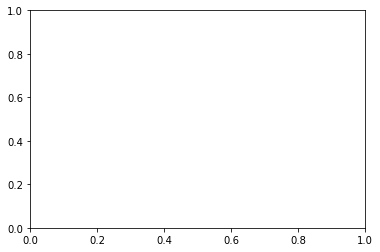

In [35]:
# plt.axes().fi

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score,classification_report, plot_confusion_matrix
from sklearn.model_selection import cross_validate
import pprint
def modelEvaluation(classifier,X_train,X_test,y_train,y_test):
    pp = pprint.PrettyPrinter(depth=4)
    y_pred_train = classifier.predict(X_train)
    print("-"*40)
    print("Classification report on train data.")
    print(classification_report(y_train,y_pred_train))
    print("-"*40)
    print("Confusion matrix on train data")
    fig, ax = plt.subplots(figsize=(40, 20))
    plot_confusion_matrix(classifier,X_train,y_train,ax=ax)
    plt.show()
    print("-"*40)
    y_pred_test = classifier.predict(X_test)
    print("Classification report on test data.")
    print(classification_report(y_test,y_pred_test))
    print("-"*40)
    print("Confusion matrix on test data")
    fig, ax = plt.subplots(figsize=(40, 20))
    plot_confusion_matrix(classifier,X_test,y_test,ax=ax)
    plt.show()
    print("-"*40)
    
    y_train_relabeled = [ "normal" if res == "normal." else "attack" for res in y_train]
    y_pred_train_relabeled = [ "normal" if res == "normal." else "attack" for res in y_pred_train]
    
    tn, fp, fn, tp = confusion_matrix(y_train_relabeled,y_pred_train_relabeled).ravel()
    
    tpr = tp/(tp + fn)
    fpr = fp/(fp + tn)
    print("-"*40)
    print("TPR on train data: ", tpr)
    print("FPR on train data: ", fpr)
    print("-"*40)
    
    y_test_relabeled = [ "normal" if res == "normal." else "attack" for res in y_test]
    y_pred_test_relabeled = [ "normal" if res == "normal." else "attack" for res in y_pred_test]
    
    tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test_relabeled,y_pred_test_relabeled).ravel()
    
    tpr_test = tp_test/(tp_test + fn_test)
    fpr_test = fp_test/(fp_test + tn_test)
    print("-"*40)
    print("TPR on test data: ", tpr_test)
    print("FPR on test data: ", fpr_test)
    print("-"*40)
    
    scoring = ['precision_macro', 'recall_macro','accuracy','f1_macro']
    pp.pprint(cross_validate(classifier, X_train, y_train, cv=5,scoring=scoring,return_train_score=True))
    
    
    

#### Train on decision tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini', splitter='best',class_weight='balanced')
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced')

----------------------------------------
Classification report on train data.
                  precision    recall  f1-score   support

           back.       1.00      1.00      1.00       774
buffer_overflow.       1.00      1.00      1.00        24
      ftp_write.       1.00      1.00      1.00         6
   guess_passwd.       1.00      1.00      1.00        42
           imap.       1.00      1.00      1.00        10
        ipsweep.       1.00      1.00      1.00       521
           land.       1.00      1.00      1.00        15
     loadmodule.       1.00      1.00      1.00         7
       multihop.       1.00      1.00      1.00         6
        neptune.       1.00      1.00      1.00     41456
           nmap.       1.00      1.00      1.00       126
         normal.       1.00      1.00      1.00     70265
           perl.       1.00      1.00      1.00         3
            phf.       1.00      1.00      1.00         3
            pod.       0.99      1.00      1.00    

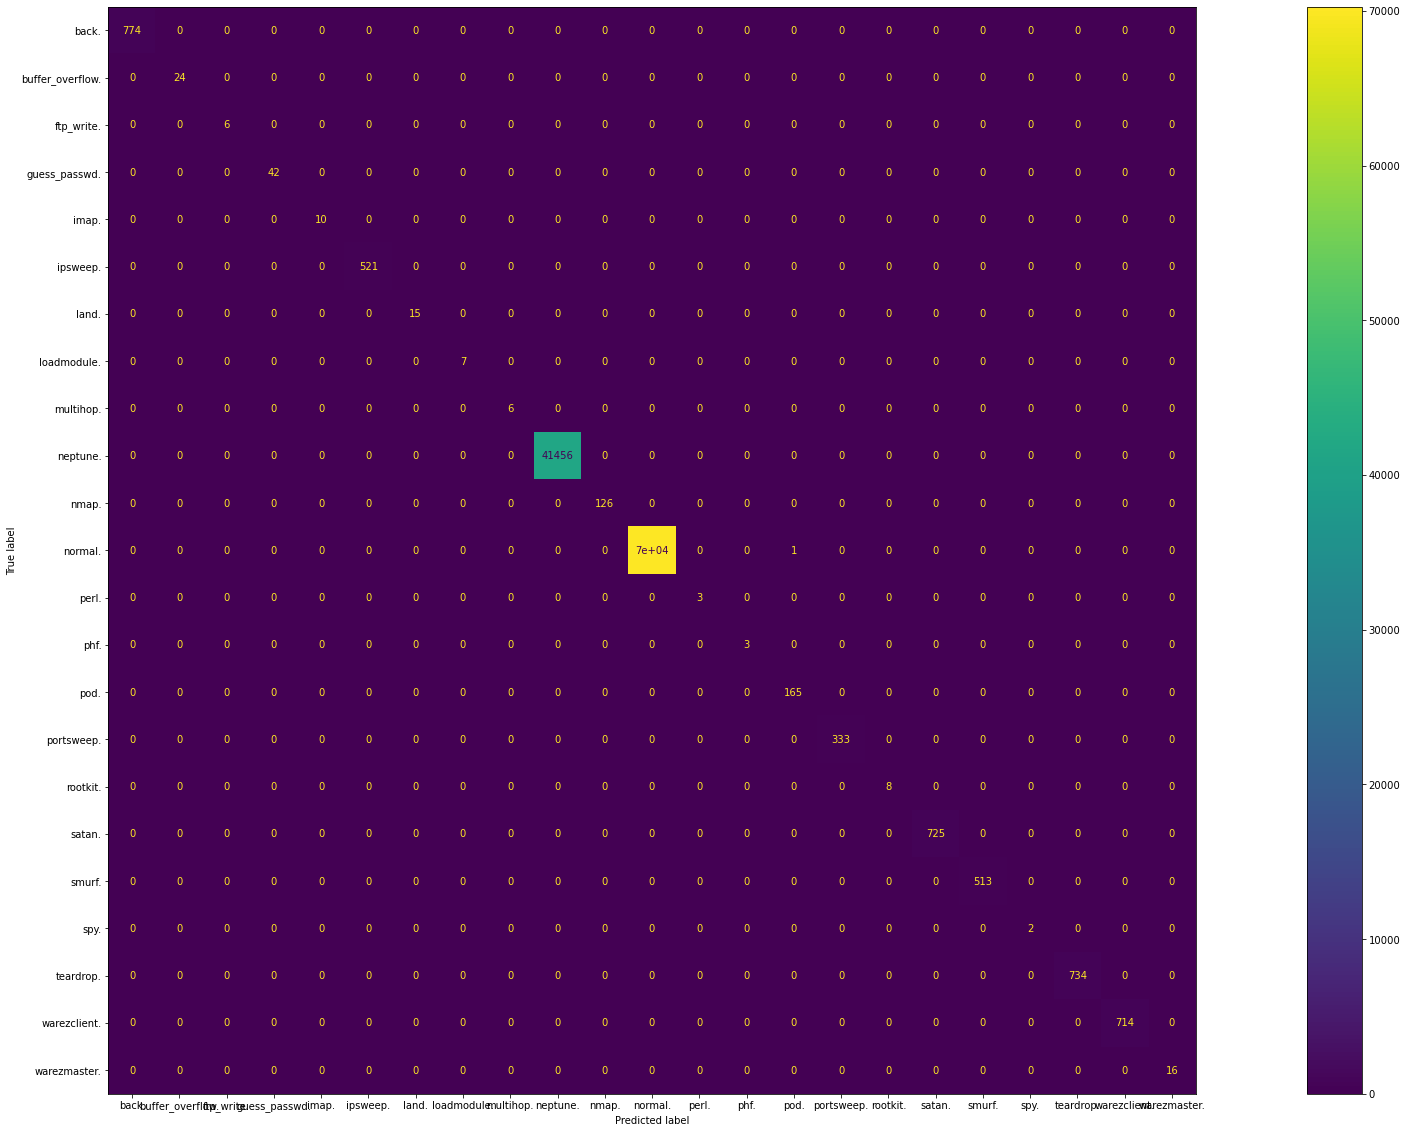

----------------------------------------
Classification report on test data.


C:\Users\msgam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\msgam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\msgam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

           back.       0.99      0.99      0.99       194
buffer_overflow.       0.83      0.83      0.83         6
      ftp_write.       1.00      0.50      0.67         2
   guess_passwd.       0.92      1.00      0.96        11
           imap.       1.00      0.50      0.67         2
        ipsweep.       0.99      0.96      0.98       130
           land.       1.00      1.00      1.00         4
     loadmodule.       1.00      0.50      0.67         2
       multihop.       0.00      0.00      0.00         1
        neptune.       1.00      1.00      1.00     10364
           nmap.       0.91      1.00      0.96        32
         normal.       1.00      1.00      1.00     17567
            phf.       1.00      1.00      1.00         1
            pod.       1.00      1.00      1.00        41
      portsweep.       0.99      0.99      0.99        83
        rootkit.       0.00      0.00      0.00         2
          sat

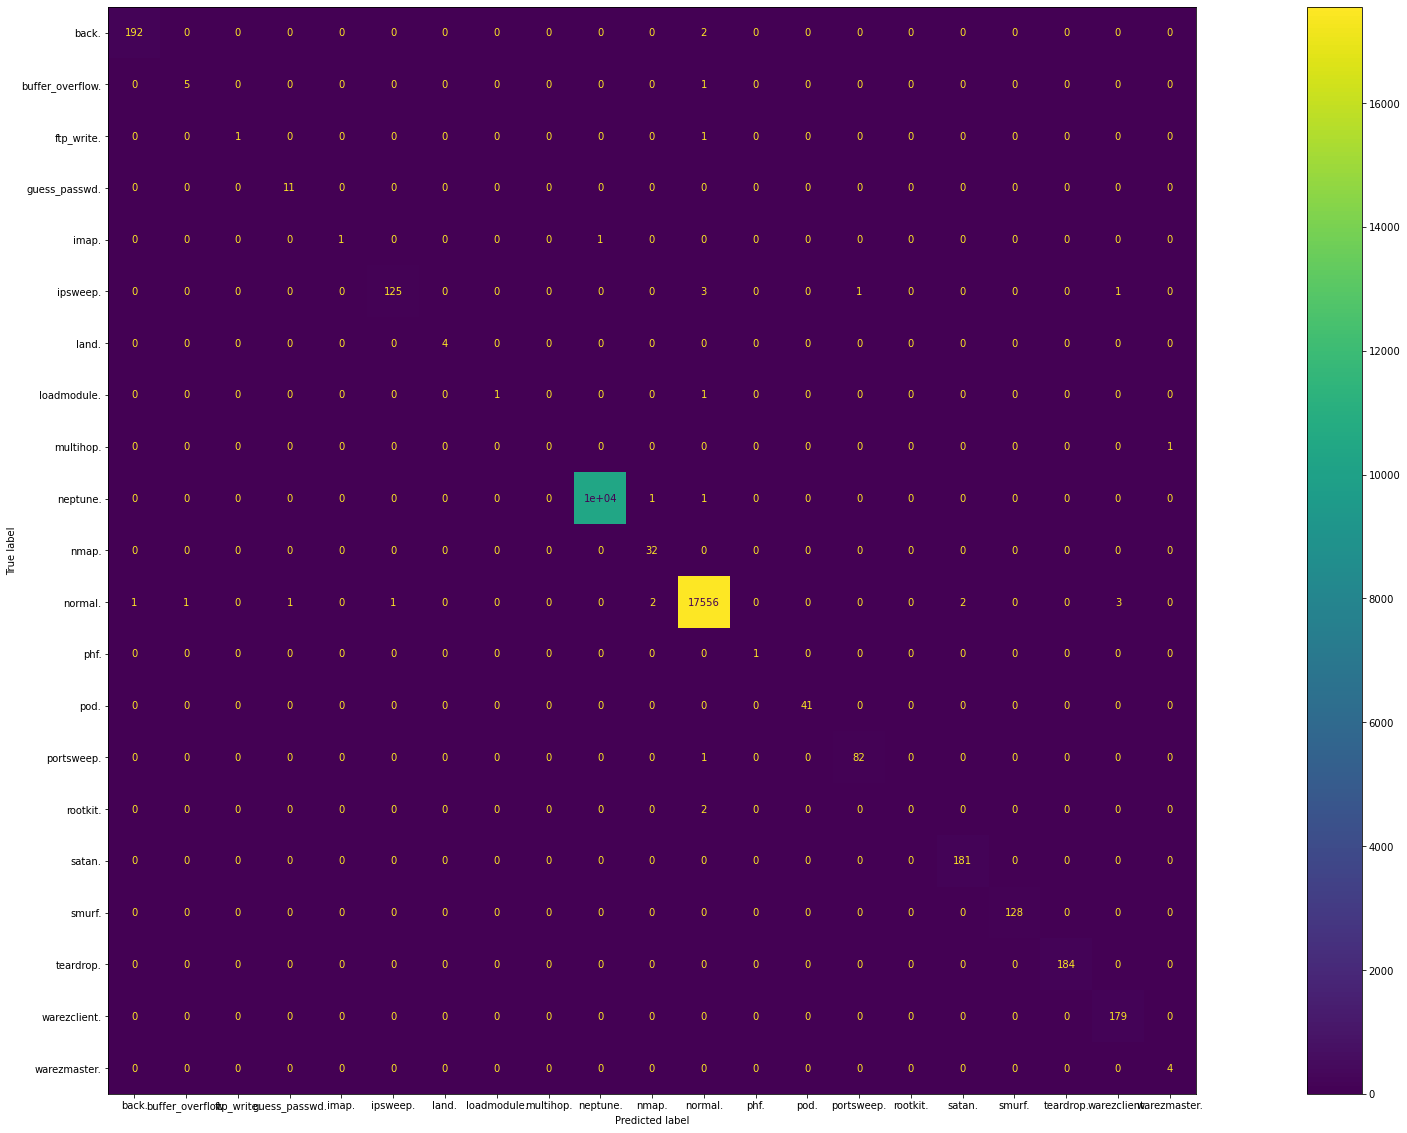

----------------------------------------
----------------------------------------
TPR on train data:  0.9999857681633815
FPR on train data:  0.0
----------------------------------------
----------------------------------------
TPR on test data:  0.9993738259236068
FPR on test data:  0.0010388710934118258
----------------------------------------


C:\Users\msgam\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\msgam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\msgam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\msgam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels w

{'fit_time': array([1.04872942, 1.02535582, 1.03722286, 0.98192096, 1.27419829]),
 'score_time': array([0.32117319, 0.27800035, 0.27970576, 0.33299804, 0.32093167]),
 'test_accuracy': array([0.9985404 , 0.99798231, 0.99832575, 0.99836861, 0.99866913]),
 'test_f1': array([0.99864861, 0.99794315, 0.99831217, 0.99831865, 0.99861302]),
 'test_precision': array([0.99880427, 0.99802916, 0.99834438, 0.99832353, 0.99857087]),
 'test_recall': array([0.9985404 , 0.99798231, 0.99832575, 0.99836861, 0.99866913]),
 'train_accuracy': array([0.99998927, 0.99998927, 1.        , 0.99998927, 1.        ]),
 'train_f1': array([0.99998929, 0.99998929, 1.        , 0.99998929, 1.        ]),
 'train_precision': array([0.99998935, 0.99998935, 1.        , 0.99998935, 1.        ]),
 'train_recall': array([0.99998927, 0.99998927, 1.        , 0.99998927, 1.        ])}


In [60]:
modelEvaluation(dt,X_train,X_test,y_train,y_test)

#### Training on Naive Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

#### Evaluating Naive Bayes model

----------------------------------------
Classification report on train data.
                  precision    recall  f1-score   support

           back.       0.07      1.00      0.12       774
buffer_overflow.       0.06      0.83      0.11        24
      ftp_write.       0.00      0.67      0.01         6
   guess_passwd.       0.98      1.00      0.99        42
           imap.       1.00      1.00      1.00        10
        ipsweep.       0.12      0.99      0.21       521
           land.       0.94      1.00      0.97        15
     loadmodule.       0.12      0.57      0.20         7
       multihop.       0.21      0.50      0.30         6
        neptune.       1.00      1.00      1.00     41456
           nmap.       0.03      0.34      0.06       126
         normal.       1.00      0.60      0.75     70265
           perl.       1.00      1.00      1.00         3
            phf.       1.00      1.00      1.00         3
            pod.       0.98      1.00      0.99    

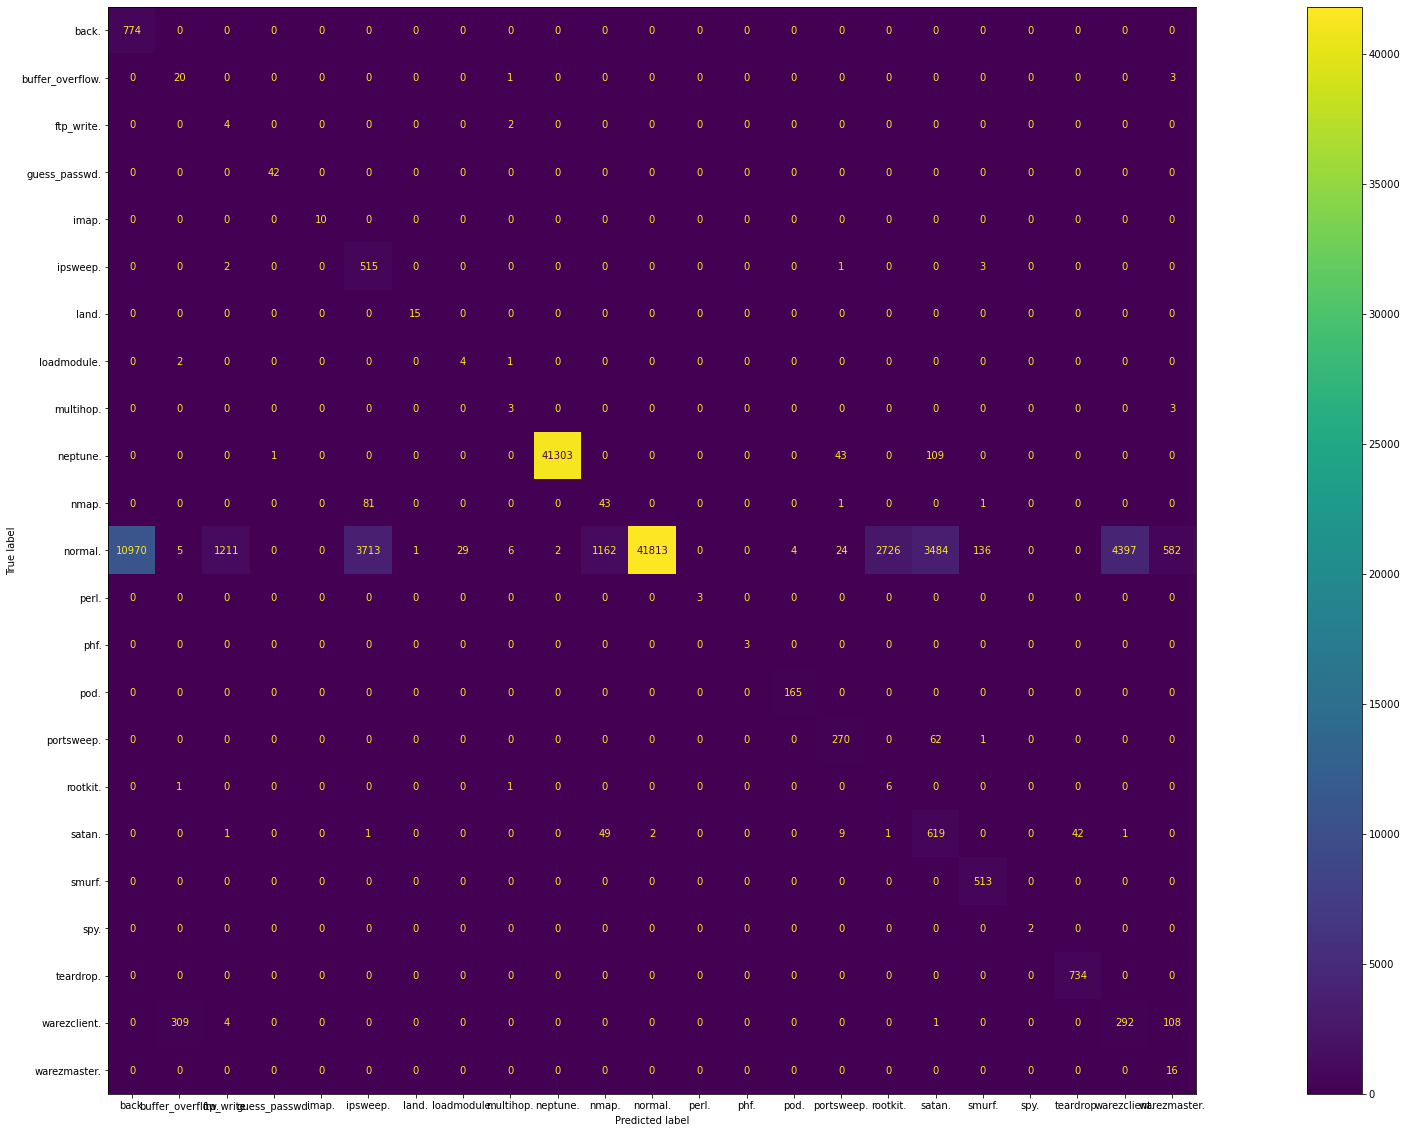

----------------------------------------
Classification report on test data.
                  precision    recall  f1-score   support

           back.       0.07      1.00      0.13       194
buffer_overflow.       0.04      0.50      0.07         6
      ftp_write.       0.00      0.00      0.00         2
   guess_passwd.       1.00      1.00      1.00        11
           imap.       1.00      0.50      0.67         2
        ipsweep.       0.12      0.99      0.21       130
           land.       1.00      1.00      1.00         4
     loadmodule.       0.00      0.00      0.00         2
       multihop.       0.00      0.00      0.00         1
        neptune.       1.00      1.00      1.00     10364
           nmap.       0.04      0.38      0.07        32
         normal.       1.00      0.60      0.75     17567
            phf.       1.00      1.00      1.00         1
            pod.       0.98      1.00      0.99        41
      portsweep.       0.74      0.82      0.78     

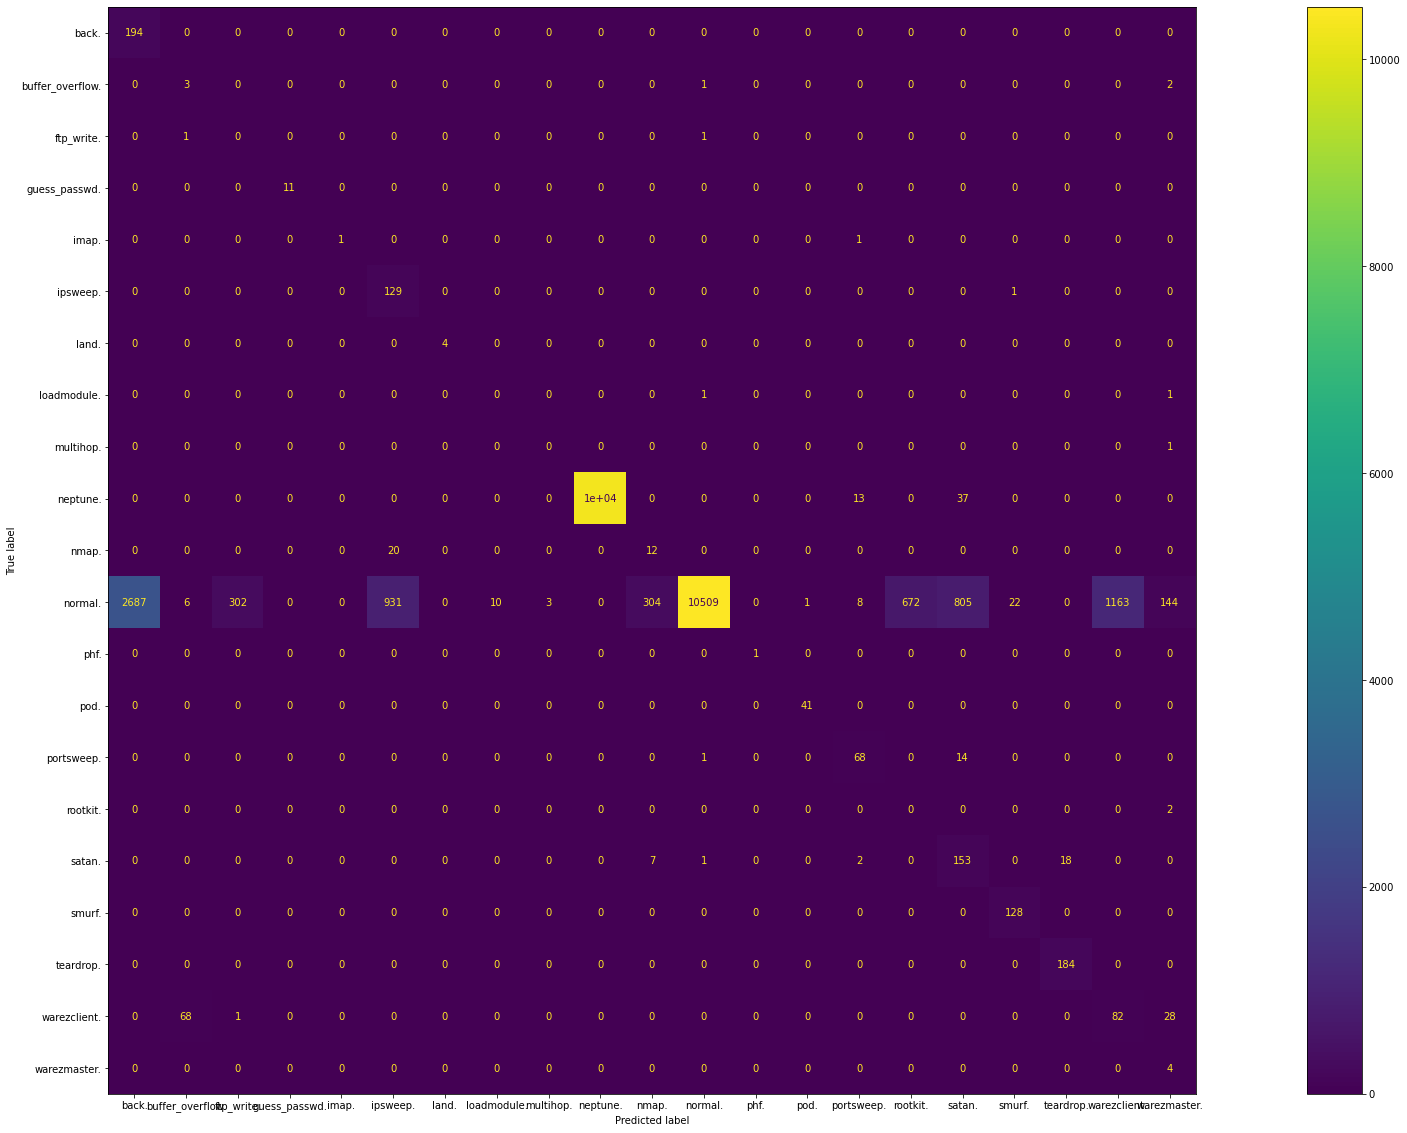

----------------------------------------
----------------------------------------
TPR on train data:  0.5950757845299935
FPR on train data:  4.3287232430794535e-05
----------------------------------------
----------------------------------------
TPR on test data:  0.5982239426196846
FPR on test data:  0.00043286295558826076
----------------------------------------


C:\Users\msgam\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\msgam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\msgam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\msgam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in 

{'fit_time': array([0.16300011, 0.23095512, 0.16898632, 0.14598727, 0.18098783]),
 'score_time': array([0.38286734, 0.41134286, 0.41239572, 0.40024352, 0.39540172]),
 'test_accuracy': array([0.76187001, 0.751524  , 0.777711  , 0.75752372, 0.74172498]),
 'test_f1_macro': array([0.46897983, 0.43731843, 0.45103275, 0.43039463, 0.46199436]),
 'test_precision_macro': array([0.45885126, 0.45137459, 0.45160804, 0.42395921, 0.4404513 ]),
 'test_recall_macro': array([0.67577966, 0.61319788, 0.63483885, 0.70581008, 0.78710265]),
 'train_accuracy': array([0.76557838, 0.75185137, 0.77706227, 0.75303461, 0.74567212]),
 'train_f1_macro': array([0.58409656, 0.59553747, 0.56786891, 0.55858313, 0.5601905 ]),
 'train_precision_macro': array([0.55695376, 0.56938601, 0.53462133, 0.53849638, 0.53380777]),
 'train_recall_macro': array([0.87667128, 0.88688444, 0.85758989, 0.85438265, 0.83534454])}


In [40]:
modelEvaluation(nb,X_train,X_test,y_train,y_test)

#### Training on Nearest Neighbors

In [42]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(X_train,y_train)

KNeighborsClassifier()

----------------------------------------
Classification report on train data.


C:\Users\msgam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\msgam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\msgam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

           back.       0.99      0.99      0.99       774
buffer_overflow.       0.96      0.92      0.94        24
      ftp_write.       1.00      0.33      0.50         6
   guess_passwd.       1.00      0.98      0.99        42
           imap.       1.00      0.70      0.82        10
        ipsweep.       0.98      0.97      0.98       521
           land.       0.93      0.93      0.93        15
     loadmodule.       1.00      0.14      0.25         7
       multihop.       0.50      0.33      0.40         6
        neptune.       1.00      1.00      1.00     41456
           nmap.       0.97      0.91      0.94       126
         normal.       1.00      1.00      1.00     70265
           perl.       0.50      1.00      0.67         3
            phf.       1.00      1.00      1.00         3
            pod.       0.99      1.00      0.99       165
      portsweep.       0.98      0.96      0.97       333
        rootk

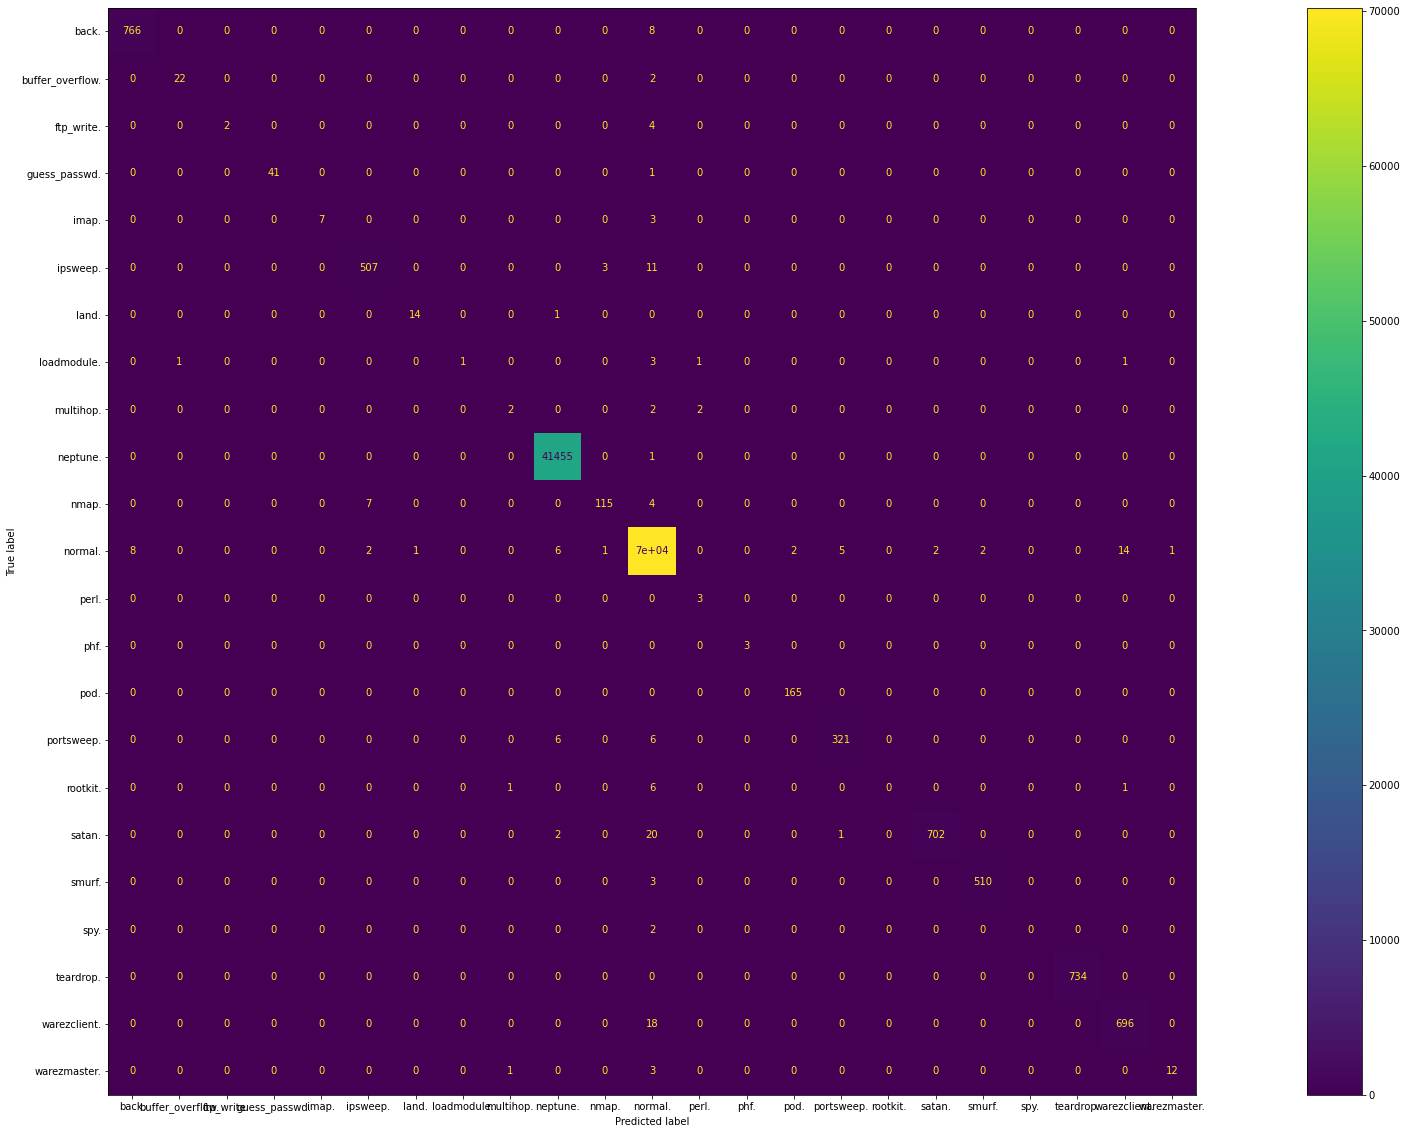

----------------------------------------
Classification report on test data.


C:\Users\msgam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\msgam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\msgam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\msgam\anaconda3\lib\site-packages\sklearn\metrics\_cla

                  precision    recall  f1-score   support

           back.       0.98      0.99      0.99       194
buffer_overflow.       0.67      0.67      0.67         6
      ftp_write.       0.00      0.00      0.00         2
   guess_passwd.       1.00      1.00      1.00        11
           imap.       1.00      0.50      0.67         2
        ipsweep.       0.94      0.95      0.95       130
           land.       1.00      1.00      1.00         4
     loadmodule.       0.00      0.00      0.00         2
       multihop.       0.00      0.00      0.00         1
        neptune.       1.00      1.00      1.00     10364
           nmap.       0.87      0.81      0.84        32
         normal.       1.00      1.00      1.00     17567
           perl.       0.00      0.00      0.00         0
            phf.       1.00      1.00      1.00         1
            pod.       1.00      1.00      1.00        41
      portsweep.       0.99      0.90      0.94        83
        rootk

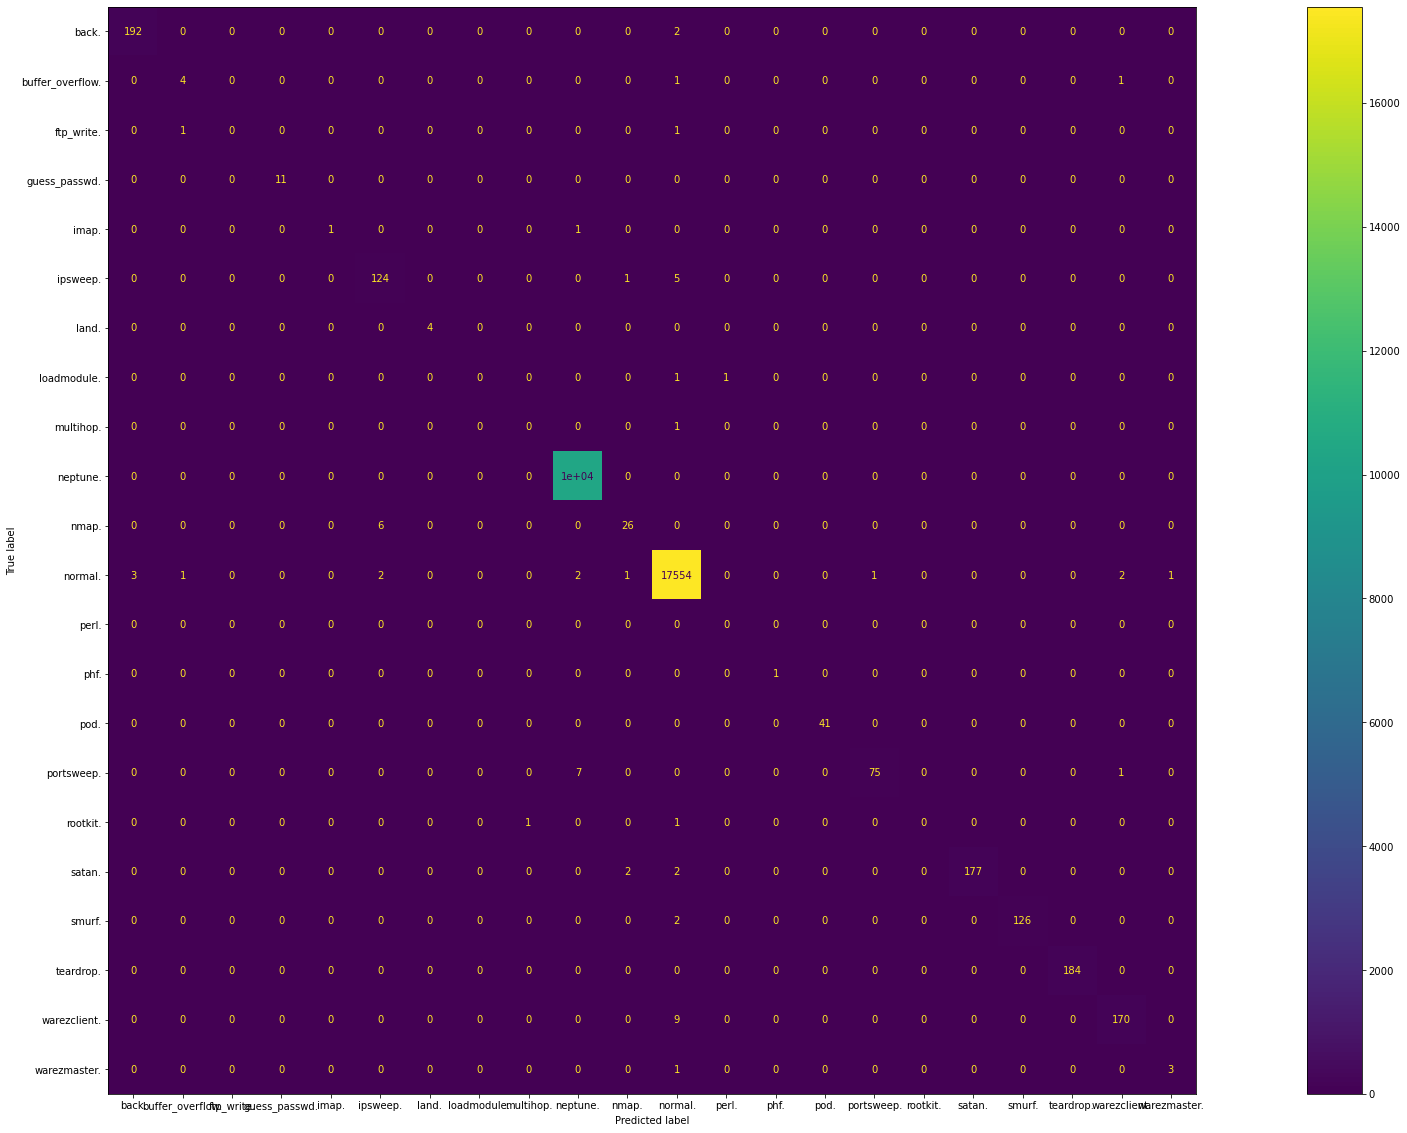

----------------------------------------
----------------------------------------
TPR on train data:  0.9993737991887853
FPR on train data:  0.002099430772893535
----------------------------------------
----------------------------------------
TPR on test data:  0.9992599760915353
FPR on test data:  0.0022508873690589557
----------------------------------------


C:\Users\msgam\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\msgam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\msgam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\msgam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in 

KeyboardInterrupt: 

In [43]:
modelEvaluation(kn,X_train,X_test,y_train,y_test)

#### Training on Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier()
randomForest.fit(X_train,y_train)

RandomForestClassifier()

----------------------------------------
Classification report on train data.
                  precision    recall  f1-score   support

           back.       1.00      1.00      1.00       774
buffer_overflow.       1.00      1.00      1.00        24
      ftp_write.       1.00      1.00      1.00         6
   guess_passwd.       1.00      1.00      1.00        42
           imap.       1.00      1.00      1.00        10
        ipsweep.       1.00      1.00      1.00       521
           land.       1.00      1.00      1.00        15
     loadmodule.       1.00      1.00      1.00         7
       multihop.       1.00      1.00      1.00         6
        neptune.       1.00      1.00      1.00     41456
           nmap.       1.00      1.00      1.00       126
         normal.       1.00      1.00      1.00     70265
           perl.       1.00      1.00      1.00         3
            phf.       1.00      1.00      1.00         3
            pod.       0.99      1.00      1.00    

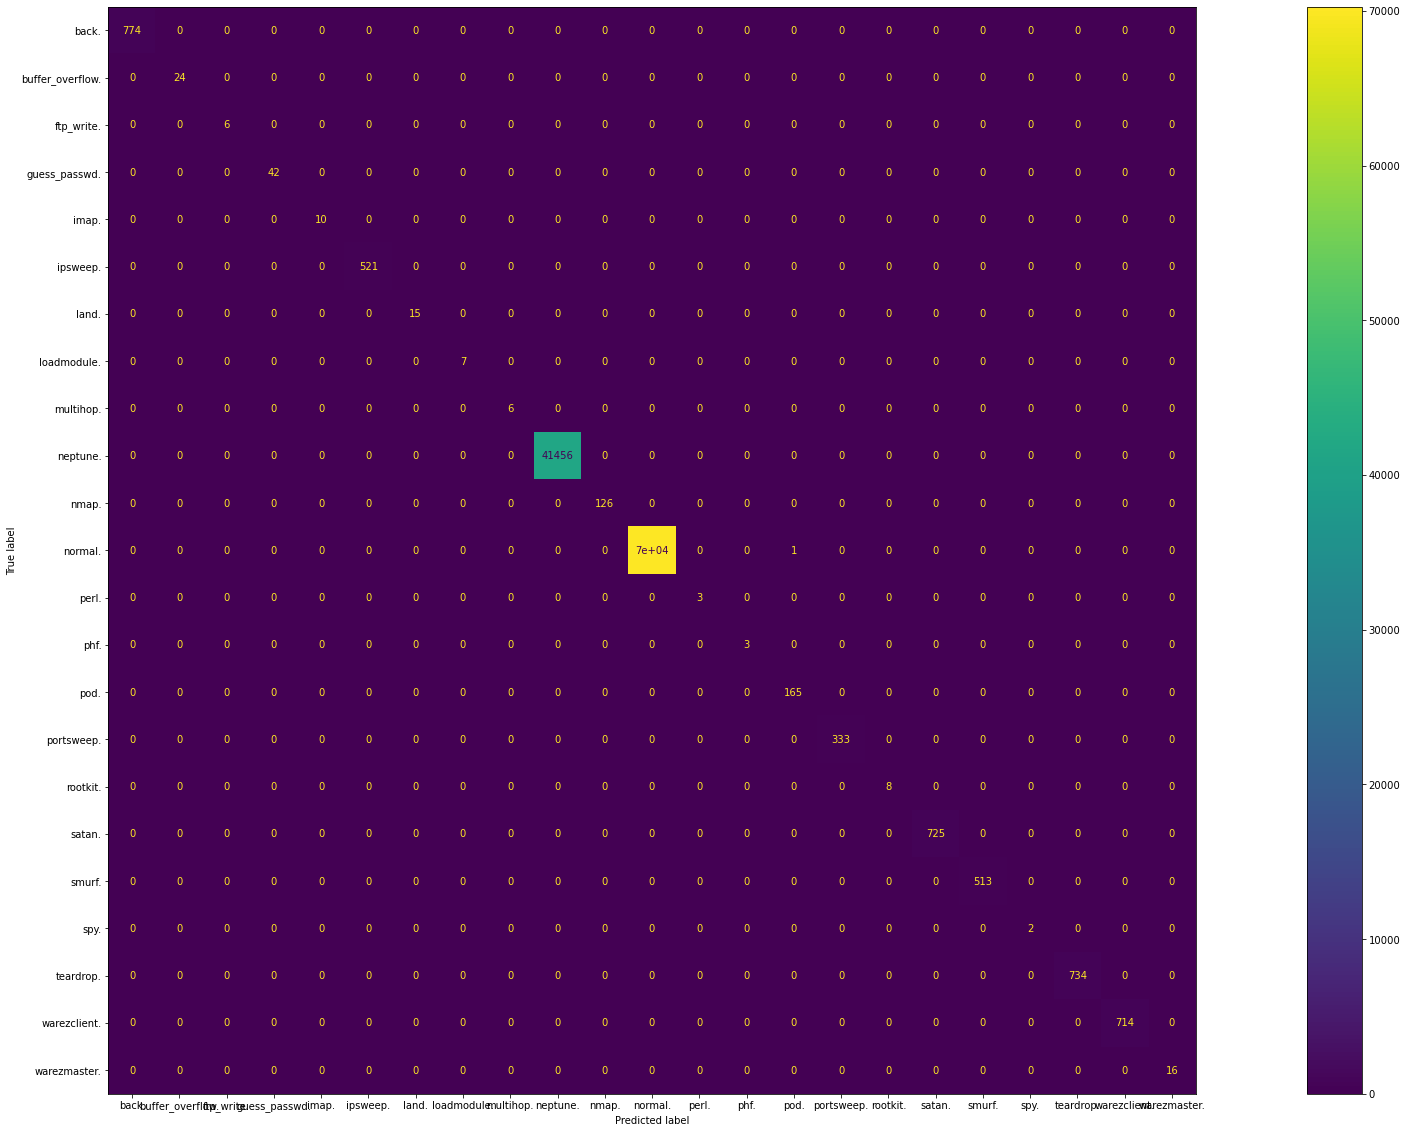

----------------------------------------
Classification report on test data.


C:\Users\msgam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\msgam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\msgam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

           back.       1.00      1.00      1.00       194
buffer_overflow.       0.67      0.67      0.67         6
      ftp_write.       0.00      0.00      0.00         2
   guess_passwd.       1.00      1.00      1.00        11
           imap.       1.00      0.50      0.67         2
        ipsweep.       1.00      0.98      0.99       130
           land.       1.00      0.75      0.86         4
     loadmodule.       0.00      0.00      0.00         2
       multihop.       0.00      0.00      0.00         1
        neptune.       1.00      1.00      1.00     10364
           nmap.       0.97      0.97      0.97        32
         normal.       1.00      1.00      1.00     17567
            phf.       1.00      1.00      1.00         1
            pod.       1.00      1.00      1.00        41
      portsweep.       0.98      0.99      0.98        83
        rootkit.       0.00      0.00      0.00         2
          sat

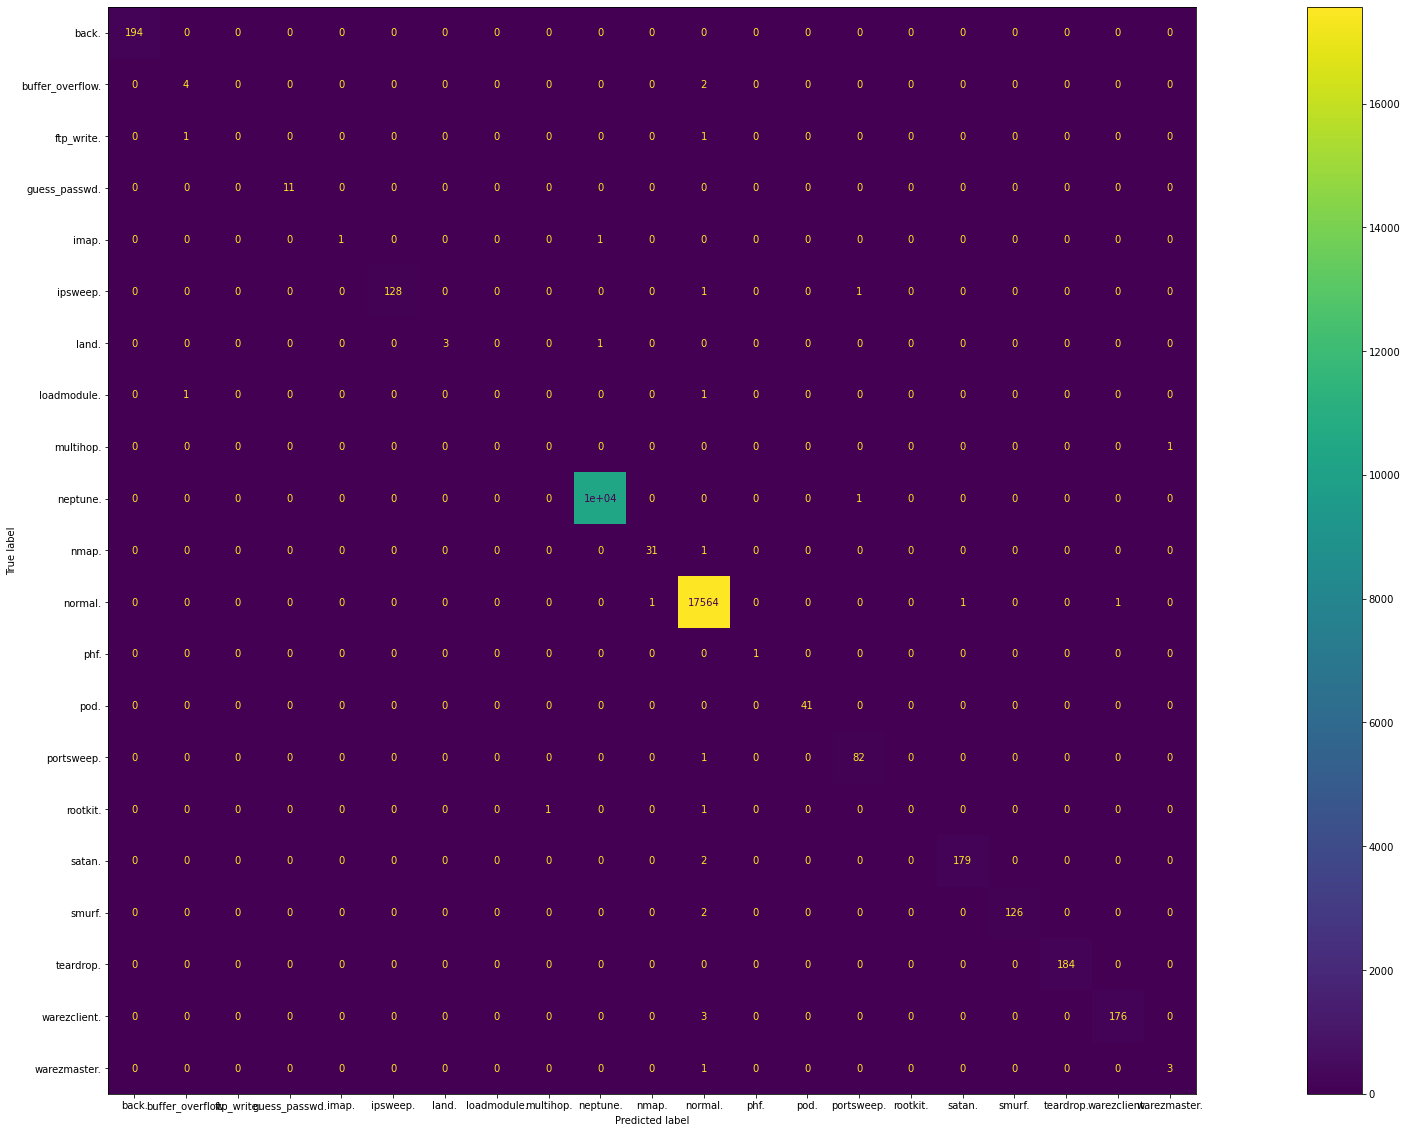

----------------------------------------
----------------------------------------
TPR on train data:  0.9999857681633815
FPR on train data:  0.0
----------------------------------------
----------------------------------------
TPR on test data:  0.9998292252518928
FPR on test data:  0.0013851614578824344
----------------------------------------


C:\Users\msgam\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\msgam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\msgam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\msgam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in 

{'fit_time': array([4.90541673, 5.33657289, 5.09274387, 5.31030416, 5.01821899]),
 'score_time': array([0.52368426, 0.53461504, 0.54409957, 0.52607608, 0.56930304]),
 'test_accuracy': array([0.99905555, 0.99918434, 0.99896969, 0.99922724, 0.99896965]),
 'test_f1_macro': array([0.79702204, 0.77762314, 0.80336051, 0.70313747, 0.77416418]),
 'test_precision_macro': array([0.84425611, 0.79942003, 0.84957468, 0.71754724, 0.79885493]),
 'test_recall_macro': array([0.77541243, 0.77158821, 0.78048763, 0.70478297, 0.76177577]),
 'train_accuracy': array([0.99998927, 0.99998927, 1.        , 0.99998927, 1.        ]),
 'train_f1_macro': array([0.99983554, 0.99983554, 1.        , 0.9998343 , 1.        ]),
 'train_precision_macro': array([0.9996731 , 0.9996731 , 1.        , 0.99999923, 1.        ]),
 'train_recall_macro': array([0.99999923, 0.99999923, 1.        , 0.99967062, 1.        ])}


In [46]:
modelEvaluation(randomForest,X_train,X_test,y_train,y_test)

In [ ]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# corrected.hist(bins=5, figsize=(30,20))
# plt.show()

In [ ]:
#corrected.corrwith(corrected['result'])

In [ ]:
#corrected.corr().style.background_gradient(plt.cm.binary, axis=1)

In [ ]:
# # back dos
# # buffer_overflow u2r
# # ftp_write r2l
# # guess_passwd r2l
# # imap r2l
# # ipsweep probe
# # land dos
# # loadmodule u2r
# # multihop r2l
# # neptune dos
# # nmap probe
# # perl u2r
# # phf r2l
# # pod dos
# # portsweep probe
# # rootkit u2r
# # satan probe
# # smurf dos
# # spy r2l
# # teardrop dos
# # warezclient r2l
# # warezmaster r2l
# result =  []
# for x in corrected['result']:
#     if x == 'normal.':
#         result.append("normal")
#     elif x == 'back.':
#         result.append("dos")
#     elif x == 'buffer_overflow.':
#         result.append("u2r")
#     elif x == 'ftp_write.':
#         result.append("r2l")
#     elif x == 'guess_passwd.':
#         result.append("r2l")
#     elif x == 'imap.':
#         result.append("r2l")
#     elif x == 'ipsweep.':
#         result.append("probe")
#     elif x == 'land.':
#         result.append("dos")
#     elif x == 'loadmodule.':
#         result.append("u2r")
#     elif x == 'multihop.':
#         result.append("r2l")
#     elif x == 'neptune.':
#         result.append("dos")
#     elif x == 'nmap.':
#         result.append("probe")
#     elif x == 'perl.':
#         result.append("u2r")
#     elif x == 'phf.':
#         result.append("r2l")
#     elif x == 'pod.':
#         result.append("dos")
#     elif x == 'portsweep.':
#         result.append("probe")
#     elif x == 'rootkit.':
#         result.append("u2r")
#     elif x == 'satan.':
#         result.append("probe")
#     elif x == 'smurf.':
#         result.append("dos")
#     elif x == 'spy.':
#         result.append("r2l")
#     elif x == 'teardrop.':
#         result.append("dos")
#     elif x == 'warezclient.':
#         result.append("r2l")
#     elif x == 'warezmaster.':
#         result.append("r2l")

In [ ]:
# len(result)

In [ ]:
# corrected['result'] = result

In [ ]:
# corrected['result'].value_counts()

In [ ]:
# #corrected.groupby(by = 'protocol_type').plot.bar()
# corrected.groupby(['protocol_type']).agg({'result': 'value_counts'})

In [ ]:
# corrected.groupby(['flag']).agg({'result': 'value_counts'})

In [ ]:
# #corrected.columns
# corrected.groupby(['protocol_type']).agg({'result': 'value_counts'}).plot(kind = 'bar',stacked=True)

In [ ]:
# from imblearn.over_sampling import RandomOverSampler

# ros = RandomOverSampler(random_state=42)

# # fit predictor and target variable
# x_ros, y_ros = ros.fit_resample(corrected.loc[:, corrected.columns != 'result'], corrected['result'])

# print('Original dataset shape', corrected['result'].shape)
# print('Resample dataset shape', y_ros.shape)

In [ ]:
# from imblearn.under_sampling import RandomUnderSampler
# cluster = {'dos':5000, 'normal':5000, 'probe' : 4107, 'r2l': 1126, 'u2r': 52}
# ros = RandomUnderSampler(random_state=42,sampling_strategy=cluster)

# # fit predictor and target variable
# x_ros, y_ros = ros.fit_resample(corrected.loc[:, corrected.columns != 'result'], corrected['result'])

# print('Original dataset shape', corrected['result'].shape)
# print('Resample dataset shape', y_ros.shape)

In [ ]:
# y_ros.value_counts()

In [ ]:
# print('Original dataset shape', corrected['result'].shape)
# print('Resample dataset shape', y_ros.shape)

In [ ]:
# y_ros.value_counts()

In [ ]:
# corrected['result'].value_counts()

In [ ]:
# x_ros.head()

In [ ]:
# # src_bytes                      0.498594
# # count                          0.481491
# # service                        0.461313
# # dst_bytes                      0.374369
# # dst_host_same_src_port_rate    0.296980
# # srv_count                      0.295341
# # logged_in                      0.275274
# # dst_host_count                 0.262049
# # protocol_type                  0.223175
# # dst_host_srv_diff_host_rate    0.204326
# # dst_host_srv_count             0.170626
# # dst_host_same_srv_rate         0.155294
# # dst_host_diff_srv_rate         0.143425
# # una2                           0.117598
# # flag                           0.101089
# # srv_diff_host_rate             0.099474

# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder

# onehot=OneHotEncoder()
# cat_attr = ['protocol_type','service','flag']


# num_attr = ['src_bytes','count','dst_bytes',
#             'dst_host_same_src_port_rate',
#             'srv_count','logged_in','dst_host_count',
#             'dst_host_srv_diff_host_rate','dst_host_srv_count',
#             'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
#             'una2', 'srv_diff_host_rate']

# pipeline = ColumnTransformer([("onehot", onehot,cat_attr),
#                              ("passthrough", "passthrough",num_attr)])
# #x_transformed = pipeline.fit_transform(x_ros).toarray()


In [ ]:
# x_transformed = pipeline.fit_transform(x_ros)

In [ ]:
# full_dataset = pd.read_csv('kddcup.data.corrected',names=colnames)

In [ ]:
# full_dataset.shape

In [ ]:
# result_full =  []
# for x in full_dataset['result']:
#     if x != 'normal.':
#         result_full.append("attack")
#     else:
#         result_full.append("normal")

In [ ]:
# full_dataset['result'] = result_full

In [ ]:
# pipeline.fit(full_dataset.loc[:, full_dataset.columns != 'result'])

In [ ]:
# X_full_tf = pipeline.transform(full_dataset.loc[:, full_dataset.columns != 'result'])

In [ ]:
# x_transformed = pipeline.transform(x_ros).toarray()

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(x_transformed,y_ros,test_size=0.2,random_state=42)

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# dt = DecisionTreeClassifier()
# dt.fit(X_train,y_train)

In [ ]:
# y_pred = dt.predict(X_test)

In [ ]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test,y_pred))

In [ ]:
# y_pred_full = dt.predict(X_full_tf)

In [ ]:
# y_pred_full.shape

In [ ]:
# print(classification_report(full_dataset.loc[:,'result'],y_pred_full))

In [ ]:
# from sklearn.naive_bayes import GaussianNB
# gb = GaussianNB()
# gb.fit(X_train,y_train)

In [ ]:
# y_pred_gb = gb.predict(X_test)

In [ ]:
# print(classification_report(y_test,y_pred_gb))

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# rndForest = RandomForestClassifier()
# rndForest.fit(X_train,y_train)

In [ ]:
# y_pred_rnd = rndForest.predict(X_test)

In [ ]:
# print(classification_report(y_test,y_pred_rnd))

In [ ]:
#icmp_df = corrected[corrected.loc[:,"protocol_type"] == "icmp"]

In [ ]:
#icmp_df['result'].value_counts()

In [ ]:
# features = ["duration","src_bytes","wrong_fragment","count","urgent","num_compromised","srv_count"]
# target = "result"
# X = icmp_df.loc[:,features]
# y = icmp_df.loc[:,target]


In [ ]:
# import numpy as np
# classes = np.unique(y)
# print(classes)

In [ ]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.gaussian_process import GaussianProcessClassifier
# from sklearn.gaussian_process.kernels import RBF
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


# classifiers = [
#     KNeighborsClassifier(3),
#     SVC(kernel="linear", C=0.025),
#     SVC(gamma=2, C=1),
#     GaussianProcessClassifier(1.0 * RBF(1.0)),
#     DecisionTreeClassifier(max_depth=5),
#     RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
#     MLPClassifier(alpha=1, max_iter=1000),
#     AdaBoostClassifier(),
#     GaussianNB(),
#     QuadraticDiscriminantAnalysis(),
# ]

# names = [
#     "Nearest Neighbors",
#     "Linear SVM",
#     "RBF SVM",
#     "Gaussian Process",
#     "Decision Tree",
#     "Random Forest",
#     "Neural Net",
#     "AdaBoost",
#     "Naive Bayes",
#     "QDA",
# ]

In [ ]:
# print("")

In [ ]:
# from sklearn.model_selection import cross_validate
# from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
# scoring = ['precision_macro', 'recall_macro','accuracy_score','f1_score']


# models = []
# cv = []
# from sklearn.metrics import plot_confusion_matrix,classification_report
# for name,classifier in zip(names,classifiers):
#     print("################################################################################")
#     print("################################  ",name ,"  ################################################")
#     classifier.fit(X_train,y_train)
#     y_pred_train = classifier.predict(X_train)
#     print("Classification report on train data.")
#     print(classification_report(y_train,y_pred_train))
#     y_pred_test = classifier.predict(X_test)
#     print("Classification report on train data.")
#     print(classification_report(y_test,y_pred_test))
#     print("confusion matrix on test data")
#     plot_confusion_matrix(classifier,X_test,y_test)
#     plt.show()
#     print("################################################################################")
#     print("\n\n\n")
#     models.append(classifier)
#     scoring = ['precision_macro', 'recall_macro','accuracy_score','f1_score']
#     cvs = cross_validate(classifier, X, y, scoring=scoring)
#     cv.append(cvs)
    

In [ ]:
from sklearn.metrics import plot_confusion_matrix,classification_report